

# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project aimed to analyzing " no show appointments" dataset which contain 100k medical appointments in Brazil,the dataset contains data about patients appointments like ScheduledDay , ‘Neighborhood,AppointmentDay, Scholarship, . ..etc.
and before starting there is some quistions may lead us to know the appourtunity if patint will come or not :

1. Who most missed the appointment women or men?
2. What percentage of ages the most booked appointments childrens , adults ..etc?
3. Who most missed the appointment childrens , adults ..etc?
4. is there a relationship between number_of_handicap and no_Show ?
5. is there a relationship between waiting_days and no_Show ?
6. is there a relationship between SMS_received and no_Show ?
7. is there a relationship between Scholarship and no_Show ?

#### the table below summrize them :

| Attribute | Description   |
|:---:|:---|
|   PatientId  | Identification of a patient|
|   AppointmentID  | Identification of each appointment|
|   Gender  | Male or Female|
|   ScheduledDay  | tells us on what day the patient set up their appointment. |
|   AppointmentDay  | The day of the actuall appointment, when they have to visit the doctor|
|   Age  | How old is the patient.|
|   Neighbourhood  | Where the appointment takes place.|
|   Scholarship  | True of False|
|   Hipertension  | True of False|
|   Diabetes  | True of False|
|   Alcoholism  | True of False|
|   Handcap  | True of False|
|   SMS_received  | 1 or more messages sent to the patient|
|   No-show  | it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up|


In [1]:
# import all the packages may i need

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
inspecting dataset to understand it structure,and figure out any changes i have to make.


### Assessing Data
#### 1.Load dataset and print some lines to make sure i import the correct dataset in the right way


In [2]:
# Load dataset and print out a few lines.
n_show= pd.read_csv('noshowappointments.csv')
n_show.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2.number of samples and columns in dataset

In [3]:
print(n_show.shape)

(110527, 14)


###### Result:
The number of rows : 110527
The number of columns : 14

#### 3.dataset information

In [4]:
n_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Result:
we can see datatypes and notect that all fields in this dataset are existing " no null values"  

#### 4.duplicate in dataset

In [5]:
#check duplicate
n_show.duplicated().sum()


0

##### Reslut :
No dupliacted rows

#### 5.number of unique values in each column

In [6]:
print (n_show.nunique())


PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


#### 6.possible values in each column
i will ignore some columns [ PatientId , AppointmentID ,ScheduledDay, AppointmentDay] 

In [7]:
print ( n_show.Gender.unique() )
print ( n_show.Age.unique() )
print ( n_show.Neighbourhood.unique() )
print ( n_show.Scholarship.unique() )
print ( n_show.Hipertension.unique() )
print ( n_show.Diabetes.unique() )
print ( n_show.Alcoholism.unique() )
print ( n_show.Handcap.unique() )
print ( n_show.SMS_received.unique() )
print ( n_show['No-show'].unique() )




['F' 'M']
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDEN

#### 7. data wrangling summary

* The dataset contains 110527 rows and 14 column.
* No duplicated rows or null values .
* unique values for [ Scholarship , Hipertension , Diabetes , Alcoholism , SMS_received ],are boolean.
* No-show column has 2 unique values but not boolean it's a string ['yes','no'].
* Handicap i was thinking it's boolean value 0,1 but i realized the possible values for this column is [0 1 2 3 4] 
* AppointmentDay do not contain time ! only date.!!!
which indicate to how many disabilities patient have </p>


### Data Cleaning 
In this section i will try to correct or remove corrupt or inaccurate records in the dataset

#### 1.Drop useless columns
because the [PatientId , AppointmentID] columns will not be usefull for my questions .

In [8]:
#drop patient id column
n_show.drop(['PatientId'], axis=1, inplace=True)
#drop appointment id column
n_show.drop(['AppointmentID'], axis=1, inplace=True)
#check
n_show.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

#### 2.Change some column name 
to be more specific and clear 

In [9]:
n_show.rename(columns={ 'Handcap':'Number_of_handicap','No-show':'No_show','AppointmentDay':'Appointment_day','ScheduledDay':'Scheduled_day'}, inplace=True)

#check
print(n_show.columns)


Index(['Gender', 'Scheduled_day', 'Appointment_day', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Number_of_handicap', 'SMS_received', 'No_show'],
      dtype='object')


###### 3.change no_show values to be 0, 1

In [10]:
#n_show['no_show'] = n_show['no_show'].map({'Yes': 1, 'No': 0}) "Doesn't work"
#n_show = no_show.replace(to_replace = "yes", value = 1) "Doesn't work"

n_show =n_show.replace({'No_show': {'Yes': 1, 'No': 0}})
#check
n_show.No_show.unique()

array([0, 1], dtype=int64)

#### 3.Age column correcting
in step 6 of dataset Assessing Data there is a patient with age -1 and zero
what to do? remove the row or relace age with mean of age column.

In [11]:
# replace it by the mean
mean_result = n_show['Age'].mean()
n_show.loc[(n_show.Age <= 0),'Age'] = mean_result
n_show.Age = n_show.Age.astype(int)
#check
print(n_show.Age.unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7  37   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  24  66  77  81  70  53  75  73
  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90  94
  86  91  98  92  96  93  95  97 102 115 100  99]


#### 4.Fixing ScheduledDay', 'AppointmentDay 

convert them to datetime

In [12]:
n_show['Scheduled_day'] = pd.to_datetime(n_show['Scheduled_day'])
n_show['Appointment_day'] = pd.to_datetime(n_show['Appointment_day'])
#check first cell 
n_show.Scheduled_day.head(1),n_show.Appointment_day.head(1)

(0   2016-04-29 18:38:08+00:00
 Name: Scheduled_day, dtype: datetime64[ns, UTC],
 0   2016-04-29 00:00:00+00:00
 Name: Appointment_day, dtype: datetime64[ns, UTC])

##### 5. create column contain the days between scheduledday and appointmentday

In [13]:
#subtract appointment day from scheduled day
n_show['waiting_days'] = (n_show.Appointment_day - n_show.Scheduled_day ).dt.days
#check column created or not
n_show.head()
#minus means no waiting days "the scheduledday and appointmentday are in the same day "

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Number_of_handicap,SMS_received,No_show,waiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


we can see there is -1 which means no waiting time .it need to be converted to 0 to be more understood

In [14]:
# replace it by zero
n_show.loc[(n_show.waiting_days <= 0),'waiting_days'] = 0
#n_show.Age = n_show.Age.astype(int)
#check
print(n_show.waiting_days.unique())


[  0   1   2   3   8  28   9  22  10  17  16  13  27  23  20  14  15  21
  42  29  30  41  31  55  44  45  38  36  37  43  49  59  51  52  64  66
  90  65  83  77  86 114 108  62  69  71  56  57  50  58  40  48  72  63
  19  32  33   5  34  35  11  12  39  46   7   4   6  24  25  47  26  18
  60  54  61 175  53  76  68  82  75  88  80 102  78  67  74  84 111  79
  85  97  93 141 154 161 168 103 132 124  95  87  89 150 125 126 110 118
  73  70  81 107 109 101 121 100 104  91  96  92 106  94 138 131 178 116
 145 122]


In [15]:
#it seems there is an outliers .
#first want to see the mean , median , mode for waiting_days
print(n_show['waiting_days'].mean())
print(n_show['waiting_days'].median())
print(n_show['waiting_days'].mode())

9.532738606856244
3.0
0    0
dtype: int64


In [16]:
#min waiting dayes is 0 and maximum is 178
n_show['waiting_days'].describe()

count    110527.000000
mean          9.532739
std          15.027729
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waiting_days, dtype: float64

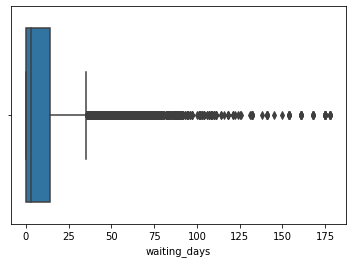

In [17]:
sns.boxplot(x=n_show["waiting_days"])

a lot of outliers !! (mean>median>mode), i will try to find the count of outliers and decide if i can delete them or replace them by median.

In [32]:
#Replacing Outliers with Median Values
print(n_show["waiting_days"].quantile(0.50)) 
print(n_show["waiting_days"].quantile(0.95)) 
n_show["waiting_days"] = np.where(n_show["waiting_days"] > 38, 3, n_show["waiting_days"])
n_show['waiting_days'].describe()

3.0
29.0


count    110527.000000
mean          6.865381
std           9.550243
min           0.000000
25%           0.000000
50%           3.000000
75%          11.000000
max          38.000000
Name: waiting_days, dtype: float64

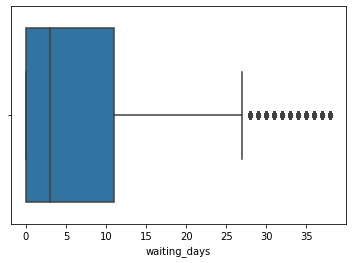

In [31]:
sns.boxplot(x=n_show["waiting_days"])

<a id='eda'></a>
## Exploratory Data Analysis


In [33]:
n_show.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Number_of_handicap,SMS_received,No_show,waiting_days
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.273933,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,6.865381
std,22.104720,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,9.550243
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,11.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,38.000000


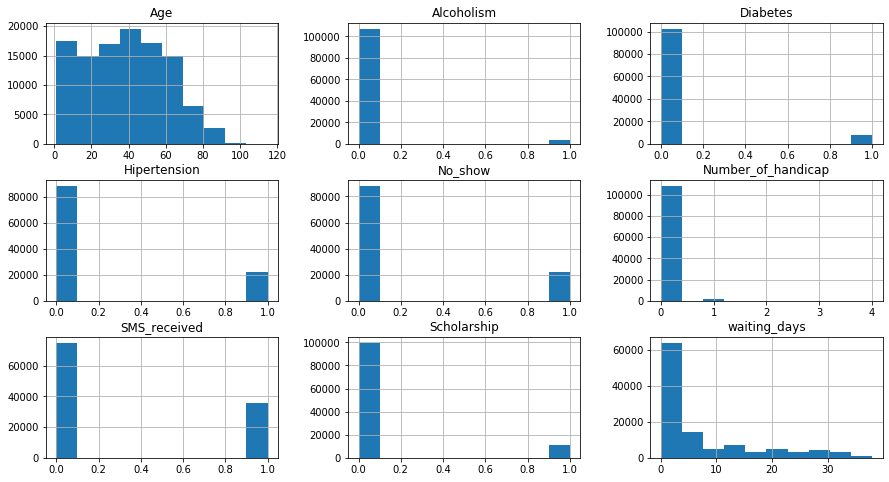

In [34]:
# histogram charts for all features
n_show.hist(figsize=(15, 8));


* age:
most of patient are under 60 years old.
* number_of_handicap:
most of patient doesn't have more than one disablilty and most of them doen't have any at all.
* sms_received:
near to half of patient does not receive sms message
* scholarship:
most of patient does not have Bolsa familia program
* no_show:
near to quarter of patient doesn't missed thier appointments
* hipertension:
near to quarter of patient have hipertension
* alcoholism and diabetes:
most of patient does not suffer from alcoholism and diabetes


### Research Question 1 (About gender: Who most missed the appointment  women or men?).


i want to see a bar showing gender distribution first

Text(0, 0.5, 'Number Of Patients')

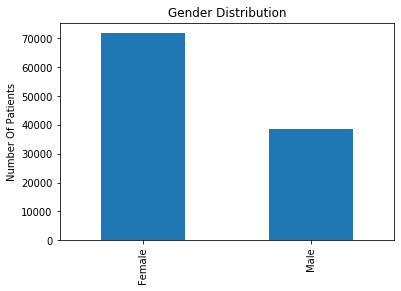

In [35]:
gender = n_show['Gender'].value_counts().plot.bar()
gender.set_title('Gender Distribution')
gender.set_xticklabels(["Female", "Male"])
gender.set_ylabel("Number Of Patients")


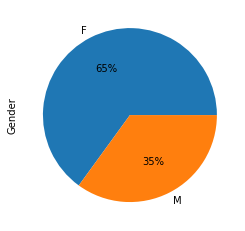

In [36]:
#same as above but using pie chart with percentages
n_show.Gender.value_counts().plot(kind='pie',autopct='%1.0f%%')

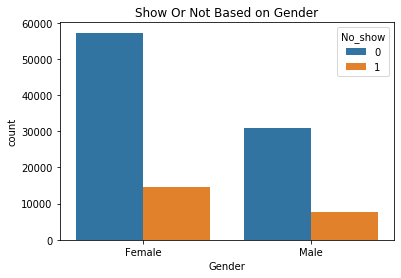

In [37]:
show_or_not= sns.countplot(x=n_show.Gender, hue=n_show.No_show, data=n_show)
show_or_not.set_title("Show Or Not Based on Gender")
show_or_not_labels=['Female','Male']
show_or_not.set_xticklabels(show_or_not_labels)
plt.show()

### Research Question 2  (About age:What percentage of ages the most booked appointments childrens , adults ..etc?)

i will divide age into age groups like :
* children(0-10) 
* teenagers(11-17)
* young adults(18-35)
* adults(36-60)
* old(>= 60)

In [38]:
#select each type and store it in varible "mask"
conditions = [
    (n_show['Age'] <= 10),
    (n_show['Age'] >=11) & (n_show['Age'] <=17),
    (n_show['Age'] >=18) & (n_show['Age'] <=35),
     (n_show['Age'] >=36) & (n_show['Age'] <=60),
    (n_show['Age'] >=60)]
choices = ['child', 'teenager', 'young adults','adult','old']
n_show['Age_Categorie'] = np.select(conditions, choices)
n_show.head()

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Number_of_handicap,SMS_received,No_show,waiting_days,Age_Categorie
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,old
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,old
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,adult


now just reordering the columns

In [39]:
n_show = n_show[["Scheduled_day", "Appointment_day","Gender","Age","Age_Categorie","No_show","Neighbourhood","Scholarship","Hipertension","Diabetes","Alcoholism","Number_of_handicap","SMS_received","waiting_days"]]
n_show.head(1)

,Scheduled_day,Appointment_day,Gender,Age,Age_Categorie,No_show,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Number_of_handicap,SMS_received,waiting_days
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,F,62,old,0,JARDIM DA PENHA,0,1,0,0,0,0,0


See how many there are in each category , then display it as chart

In [40]:
#total number of each category
n_show['Age_Categorie'].value_counts()

adult           41301
young adults    25624
old             19762
child           15210
teenager         8630
Name: Age_Categorie, dtype: int64

Text(17.200000000000003, 0.5, 'Number Of Patients')

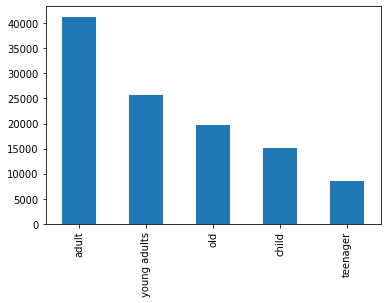

In [41]:
ages_categorie = n_show['Age_Categorie'].value_counts().plot.bar()
gender.set_title('Age_Categorie Distribution')
gender.set_xticklabels(["children", "teenagers","young_adults","adults","old"])
gender.set_ylabel("Number Of Patients")

## Research Question 3  (About age:Who most missed the appointment childrens , adults ..etc?)

[Text(0, 0, 'children'),
 Text(0, 0, 'teenagers'),
 Text(0, 0, 'young_adults'),
 Text(0, 0, 'adults'),
 Text(0, 0, 'old')]

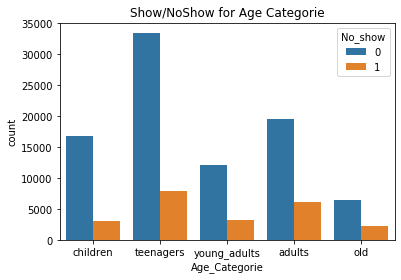

In [42]:
#ages_vs_noShow=sns.countplot(data=n_show.loc[n_show['No_show']==1], x='Age_Categorie')
#ages_vs_noShow.set(xlabel='Age Categorie', ylabel='Number Of Patients',title='No Show of Age Categorie')

ax = sns.countplot(x=n_show.Age_Categorie, hue=n_show.No_show, data=n_show)
ax.set_title("Show/NoShow for Age Categorie")
x_ticks_labels=["children", "teenagers","young_adults","adults","old"]
ax.set_xticklabels(x_ticks_labels)

### Research Question 4  (About Number_of_handicap: is there a relationship between number_of_handicap and no_Show ?)

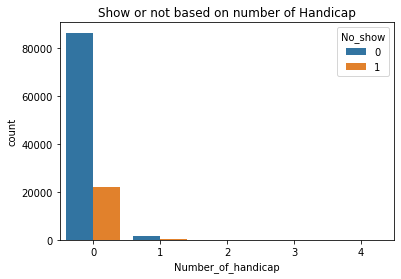

In [43]:
handicap_vs_NoShow = sns.countplot(x=n_show.Number_of_handicap, hue=n_show.No_show, data=n_show)
handicap_vs_NoShow.set_title("Show or not based on number of Handicap")
plt.show()

### Research Question 5   is there a relationship between waiting_days and no_Show ?)

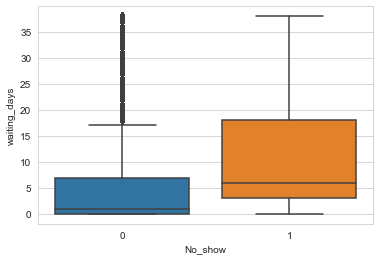

In [44]:

sns.set_style("whitegrid") 
  
sns.boxplot(x = 'No_show', y = 'waiting_days', data = n_show)

### Research Question 6 :  is there a relationship between SMS_received and no_Show ?)


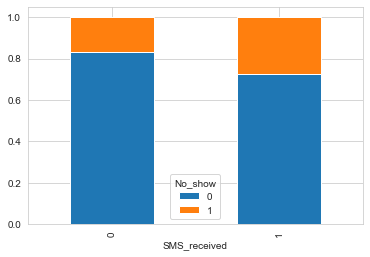

In [47]:

No_show_vs_SMS_received = n_show.groupby("SMS_received")['No_show'].value_counts(normalize=True).unstack()
No_show_vs_SMS_received.plot(kind='bar', stacked='True')

### Research Question 7: is there a relationship between Scholarship and no_Show ?)

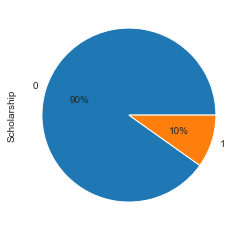

In [49]:
n_show.Scholarship.value_counts().plot(kind='pie',autopct='%1.0f%%')

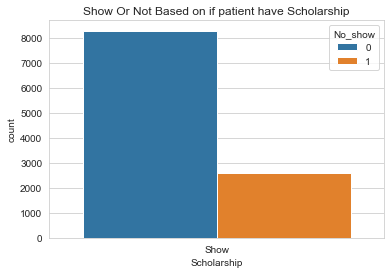

In [56]:

have_Scholarship =n_show.loc[(n_show.Scholarship == 1),'Scholarship'] 
have_Scholarship_vs_No_show= sns.countplot(x= have_Scholarship, hue=n_show.No_show, data=n_show)
have_Scholarship_vs_No_show.set_title("Show Or Not Based on if patient have Scholarship")
have_Scholarship_labels=['Show','Not show']
have_Scholarship_vs_No_show.set_xticklabels(have_Scholarship_labels)
plt.show()


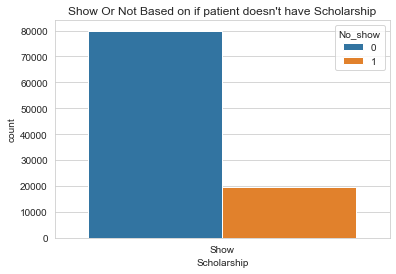

In [57]:

no_Scholarship =n_show.loc[(n_show.Scholarship == 0),'Scholarship'] 
no_Scholarship_vs_No_show= sns.countplot(x= no_Scholarship, hue=n_show.No_show, data=n_show)
no_Scholarship_vs_No_show.set_title("Show Or Not Based on if patient doesn't have Scholarship")
no_Scholarship_labels=['Show','Not show']
no_Scholarship_vs_No_show.set_xticklabels(no_Scholarship_labels)
plt.show()


#### Limitations
The dataset was a little bit pretty good , but there is some notes i found like in appointment day the time is set to zero (what if it's the reason of making patient not show ! ?)

<a id='conclusions'></a>
## Conclusions



After The analysis process i found some notes :
1. Females were the most booked for appointments, and the gender of the patient did not make a clear difference in determining whether or not to come.
2&3. Most age groups were adults, followed by young adult, the elderly, children, and the least is teenagers.And the age group didn't make a difference in determining whether or not to come.
4. Most patients did not have handicapes, only a few had only one handicap. There was no relationship between handicapes and no-show.
5. Most of the attendees are those who booked the appointment on the same day, and also those whose waiting time was less than ten days,No patient booked an appointment on the same day and did not come.
6. A quarter of the patients who received a sms did not show.
7. Only 10% of patients had a scholarship, and there was no effect in the presence of the scholarship or not in attendance